# <center> Statistics Project </center>

### Group Members Details
### 1) V Hemanth Reddy (AI23BTECH11033)
### 2) Sattar Saif (MA23BTECH110)
### 3) Anurag (MA23BTECH11)

# Introduction
The COVID-19 pandemic has been one of the most significant global health crises in recent history, affecting millions of people worldwide. In this project, we tried to understand the trends and impact of the virus, we have collected datasets: "Weekly COVID-19 cases and deaths by date reported to WHO" and "Latest reported counts of COVID-19 cases and deaths" , which provide cumulative totals up to each reported week, from the World Health Organization (WHO) website. This dataset provides a comprehensive overview of how the pandemic evolved across different countries and regions. The data spans approximately 200 countries, covering various time periods, allowing us to analyze patterns, trends, and variations in the spread of the virus.

# About this Data
The dataset for this project has been sourced from the [World Health Organization (WHO) COVID-19 Dashboard](https://data.who.int/dashboards/covid19/data) and includes weekly reported cases and deaths, along with their cumulative totals. Since raw data often contains missing values, we have preprocessed the dataset to enhance its accuracy and usability for statistical analysis.

Our preprocessing steps included handling missing values, correcting inconsistencies, and structuring the data for better visualization. Specifically:

- We manually added WHO region names where they were missing.
- For missing weekly reported cases and deaths, we cross-verified online and confirmed that they represent 0 reported cases and deaths for that week.
- In the "Latest Reported Counts of COVID-19 Cases and Deaths" dataset, we removed the following columns:
    - `Cases - newly reported in last 7 days`
    - `Cases - newly reported in last 7 days per 100,000 population`
    - `Cases - newly reported in last 24 hours`
    - `Deaths - newly reported in last 7 days`
    - `Deaths - newly reported in last 7 days per 100,000 population`
    - `Deaths - newly reported in last 24 hours`
      
These columns were excluded because we are primarily working with data covering the entire duration of the pandemic, while these columns represent cases or deaths reported in the last 7 days or 24 hours on a specific date in the year 2025, which falls well beyond the pandemic period.

By applying these preprocessing steps, we have ensured that the dataset is clean, structured, and suitable for statistical analysis, allowing for meaningful insights into the trends and impact of COVID-19 cases and deaths worldwide. And the data set after preprocessing are presented below in the form of hyperlinks:
- [Cumulative WHO data](https://drive.google.com/file/d/1QhKfASYyud2iCIJ-y7xhLQqVF4ZIEoo5/view?usp=sharing)
- [Weekly reported WHO data](https://drive.google.com/file/d/1gUIyR6dC-gMqdmnQ5wST0yqaa4kdZOJu/view?usp=sharing)
  
These data sets can be accessed by IITH mail ID's only. 

# Objective of the Project
Our aim is to analyze the dataset using statistical techniques to:
1. Identify trends in the weekly rise of cases and deaths.
2. Compare COVID-19 impact across different WHO regions and across differnet time periods.
3. Use statistical measures like mean, median, and standard deviation to summarize the data.
4. Visualize the data using bar charts, line graphs, and box plots for better insights.

Through this project, we seek to understand how the pandemic evolved over time, how different regions were affected, and what statistical conclusions can be drawn from the WHO data.

# Importing Data and Setting Up Functions for Analysis

Before starting our analysis, we first need to load important python libraries, import the dataset and define functions to handle the data efficiently. By organizing our approach with reusable functions, we can efficiently manipulate the dataset and extract meaningful insights.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import random
import math
import csv
from scipy.stats import norm

In [44]:
def central_tendencies(data):
    mean = np.mean(data)
    median = np.median(data)
    values, counts = np.unique(data, return_counts=True)
    mode_index = np.argmax(counts)
    mode = values[mode_index]
    return round(mean,2), round(median,2), round(mode,2)

def dispersion(data):
    variance = np.var(data)
    std_dev = np.std(data)
    minimum = np.min(data)
    maximum = np.max(data)
    range1 = np.max(data) - np.min(data)
    quartile1 = np.percentile(data, 25)
    quartile3 = np.percentile(data, 75)
    interquartile_range = quartile3 - quartile1
    return round(variance,2), round(std_dev,2), round(minimum,2), round(maximum,2), round(range1,2), round(quartile1,2), round(quartile3,2), round(interquartile_range,2)

def stats_display(data):
    
    stats = {
        "Metric": [],
        "Mean": [],
        "Median": [],
        "Variance": [],
        "Standard Deviation": [],
        "Minimum": [],
        "Maximum": [],
        "Range": [],
        "Quartile 1": [],
        "Quartile 3": [],
        "Interquartile Range": []
    }
    
    metrics = {
        "Total Cases": data["Cases - cumulative total"],
        "Total Deaths": data["Deaths - cumulative total"],
        "Cases per 100K": data["Cases - cumulative total per 100000 population"],
        "Deaths per 100K": data["Deaths - cumulative total per 100000 population"],
    }
    
    for metric_name, metric_data in metrics.items():
        mean, median, mode = central_tendencies(metric_data)
        variance, std_dev, minimum, maximum, rnge, quartile1, quartile3, interquartile_range = dispersion(metric_data)
        
        stats["Metric"].append(metric_name)
        stats["Mean"].append(mean)
        stats["Median"].append(median)
        stats["Variance"].append(variance)
        stats["Standard Deviation"].append(std_dev)
        stats["Minimum"].append(minimum)
        stats["Maximum"].append(maximum)
        stats["Range"].append(rnge)
        stats["Quartile 1"].append(quartile1)
        stats["Quartile 3"].append(quartile3)
        stats["Interquartile Range"].append(interquartile_range)

    df = pd.DataFrame(stats)
    display(HTML(df.to_html(index=False)))
    


In [45]:
s_data = []
with open("Cumulative_WHO_data.csv","r") as file:
    content = csv.reader(file)
    next(content)
    for line in content:
        line=np.array(line)
        
        x0  = line[0]                   #country
        x1  = line[1]                   #WHO region
        x2  = int(float(line[2]))       #Cases - cumulative total
        x3  = int(float(line[3]))       #Cases - cumulative total per 100000 population
        x4  = int(float(line[4]))       #Deaths - cumulative total
        x5  = int(float(line[5]))       #Deaths - cumulative total per 100000 population
        # print(line[0])
        
    
        s_data.append([x0,x1,x2,x3,x4,x5])

In [46]:
s_Continental_deaths = {'African': 0, 'Americas': 0, 'Eastern Mediterranean': 0, 'European': 0, 'South-East Asia': 0, 'Western Pacific': 0}
s_Continental_cases = {'African': 0, 'Americas': 0, 'Eastern Mediterranean': 0, 'European': 0, 'South-East Asia': 0, 'Western Pacific': 0}

for line in s_data:
    if line[1] == 'Africa':
        s_Continental_deaths['African'] += line[4]
        s_Continental_cases['African'] += line[2]
        
    if line[1] == 'Americas':
        s_Continental_deaths['Americas'] += line[4]
        s_Continental_cases['Americas'] += line[2]
        
    if line[1] == 'Eastern Mediterranean':
        s_Continental_deaths['Eastern Mediterranean'] += line[4]
        s_Continental_cases['Eastern Mediterranean'] += line[2]

    if line[1] == 'Europe':
        s_Continental_deaths['European'] += line[4]
        s_Continental_cases['European'] += line[2]

    if line[1] == 'South-East Asia':
        s_Continental_deaths['South-East Asia'] += line[4]
        s_Continental_cases['South-East Asia'] += line[2]
        
    if line[1] == 'Western Pacific':
        s_Continental_deaths['Western Pacific'] += line[4]
        s_Continental_cases['Western Pacific'] += line[2]
        


# print("Continental_deaths: ",s_Continental_deaths)
# print("Continental_cases: ", s_Continental_cases)

def s_autopct_format(pct):
    return f'{pct:f}%' if pct > 0 else '0%'

In [47]:
s_Weekly_data = []
with open("Weekly_covid_data.csv","r") as file:
    content = csv.reader(file)
    next(content)
    for line in content:
        x0  = line[0]                   #Date_reported
        x1  = line[1]                   #Country_code
        x2  = line[2]                   #Country
        x3  = line[3]                   #WHO_region
        x4  = int(float(line[4]))       #New_cases
        x5  = int(float(line[5]))       #Cumulative_cases
        x6  = int(float(line[6]))       #New_deaths
        x7  = int(float(line[7]))       #Cumulative_deaths
        
    
        s_Weekly_data.append([x0,x1,x2,x3,x4,x5,x6,x7])

In [48]:
s_yearly_cases = {'2020': 0, '2021': 0, '2022': 0, '2023': 0, '2024': 0}
s_yearly_deaths = {'2020': 0, '2021': 0, '2022': 0, '2023': 0, '2024': 0}

for line in s_Weekly_data:
    if '2020-' in line[0]:
        s_yearly_cases['2020'] += line[4]
        s_yearly_deaths['2020'] += line[6]
    
    if '2021-' in line[0]:
        s_yearly_cases['2021'] += line[4]
        s_yearly_deaths['2021'] += line[6]

    if '2022-' in line[0]:
        s_yearly_cases['2022'] += line[4]
        s_yearly_deaths['2022'] += line[6]

    if '2023-' in line[0]:
        s_yearly_cases['2023'] += line[4]
        s_yearly_deaths['2023'] += line[6]

    if '2024-' in line[0]:
        s_yearly_cases['2024'] += line[4]
        s_yearly_deaths['2024'] += line[6]

print(s_yearly_cases)
print(s_yearly_deaths)

{'2020': 80316790, '2021': 200297624, '2022': 424017189, '2023': 69155133, '2024': 3483531}
{'2020': 1897533, '2021': 3549358, '2022': 1248805, '2023': 319022, '2024': 68200}


In [49]:
df = pd.read_csv("Weekly_covid_data.csv")

s_weekly_cases = (df.groupby('Date_reported')['Cumulative_cases'].sum().reset_index()).drop(columns=['Date_reported'])
s_cweek_cases = [item[0]  for item in s_weekly_cases.values.tolist()]


s_weekly_deaths = (df.groupby('Date_reported')['Cumulative_deaths'].sum().reset_index()).drop(columns=['Date_reported'])
s_cweek_deaths = [item[0]  for item in s_weekly_deaths.values.tolist()]
s_weeks = np.arange(1,len(s_cweek_cases)+1)
s_greater_than_cases = [s_cweek_cases[-1] - s_cweek_cases[i] for i in np.arange(len(s_cweek_cases))]
s_greater_than_deaths = [s_cweek_deaths[-1] - s_cweek_deaths[i] for i in np.arange(len(s_cweek_deaths))]


In [50]:
h_data = pd.read_csv('Cumulative_WHO_data.csv')
h_total_cases=h_data["Cases - cumulative total"]
h_total_deaths=h_data["Deaths - cumulative total"]
h_per100_cases=h_data["Cases - cumulative total per 100000 population"]
h_per100_deaths=h_data["Deaths - cumulative total per 100000 population"]

# WHO Regional Analysis

The World Health Organization (WHO) classifies countries into six regions to effectively coordinate global health initiatives and manage public health data and we have chosen to analyze cumulative COVID-19 cases and deaths based on WHO regions rather than traditional continental divisions.


| **WHO Region**                   | **Abbreviation** | **Geographical Coverage**                             |
| -------------------------------- | ---------------- | ----------------------------------------------------- |
| **African Region**               | **AFRO**         | Most countries in Africa                              |
| **Region of the Americas**       | **AMRO**         | North, Central, and South America                     |
| **Eastern Mediterranean Region** | **EMRO**         | Middle East, North Africa, and parts of Central Asia  |
| **European Region**              | **EURO**         | Europe and parts of Central Asia                      |
| **South-East Asia Region**       | **SEARO**        | India, Indonesia, Thailand, and neighboring countries |
| **Western Pacific Region**       | **WPRO**         | China, Australia, Japan, and Pacific nations          |

Let’s start our analysis by exploring the cumulative cases and deaths reported across different WHO regions throughout the entire pandemic.

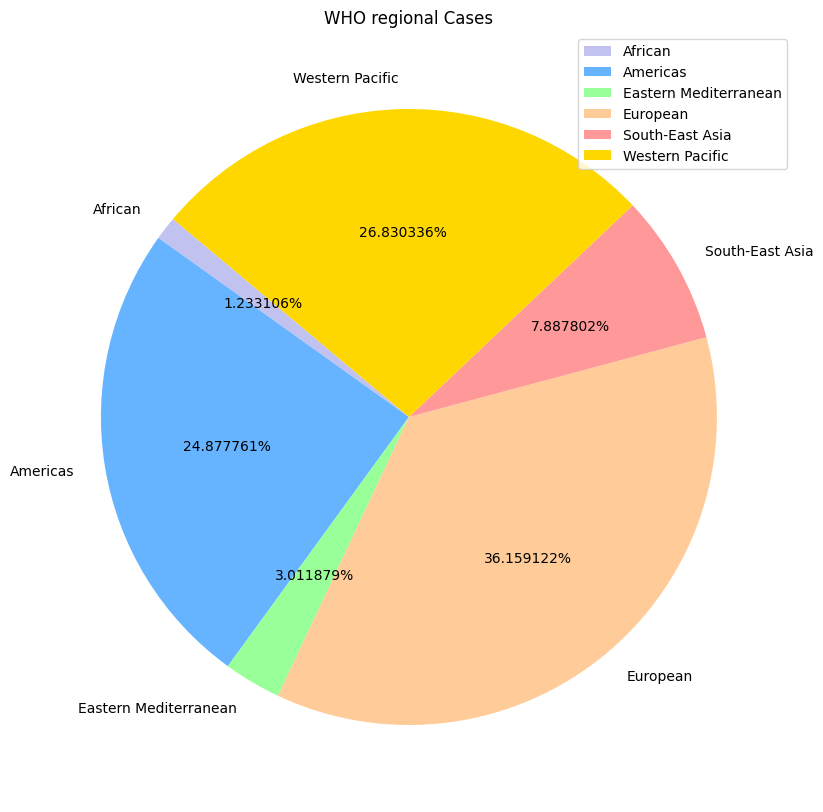

In [51]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999', '#FFD700']
plt.figure(figsize=(10, 10))
    
plt.pie(s_Continental_cases.values(), labels= s_Continental_cases.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("WHO regional Cases")
plt.legend()
plt.show()

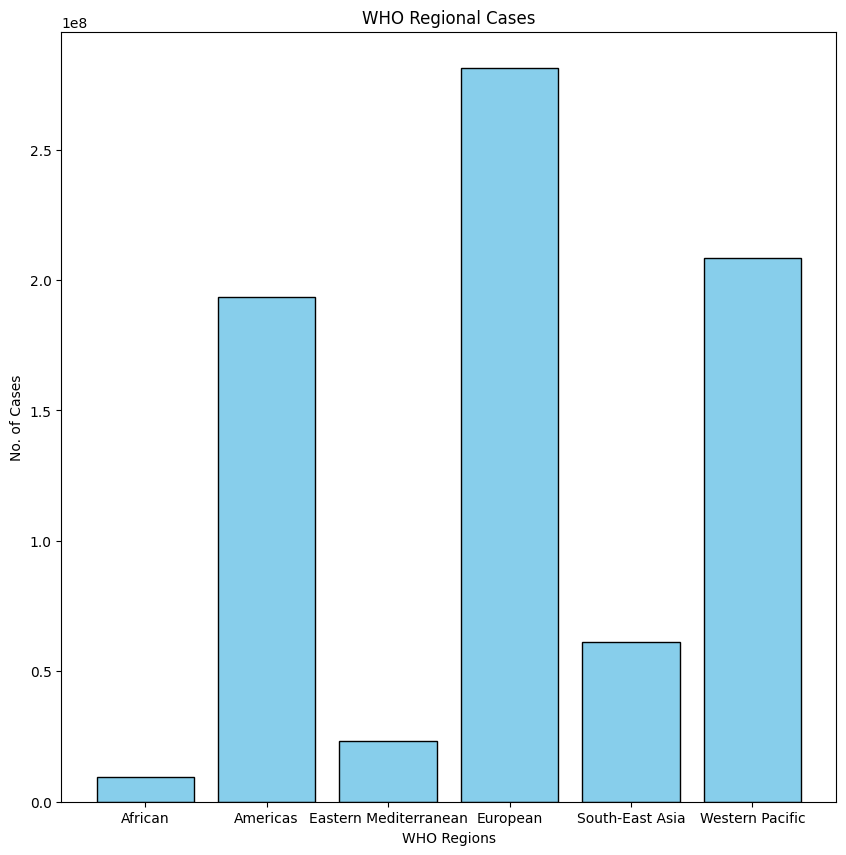

In [52]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_Continental_cases.keys(), s_Continental_cases.values(), color='skyblue', edgecolor='black')
plt.title("WHO Regional Cases")
plt.xlabel("WHO Regions")
plt.ylabel("No. of Cases")
plt.show()

The pie chart and bar graph provide a clear representation of the distribution of COVID-19 cases across the six WHO regions throughout the entire pandemic period. From both graphs, it is evident that the European Region (EURO) had the highest number of reported cases, making up over one-third of the global case count. This is reflected in the bar graph’s tallest bar and the largest sector in the pie chart (36.16%). The Western Pacific Region (WPRO) and the Region of the Americas (AMRO) followed closely, with significant case counts, the Western Pacific Region (26.83%) had a high proportion of cases. The South-East Asia Region (SEARO) recorded fewer cases (7.89%), despite having highly populated countries like India and Indonesia. The Eastern Mediterranean Region (EMRO) reported an even smaller proportion of cases (3.01%). The African Region (AFRO) had the smallest share of reported cases (1.23%), which is consistent across both the pie chart and the bar graph.

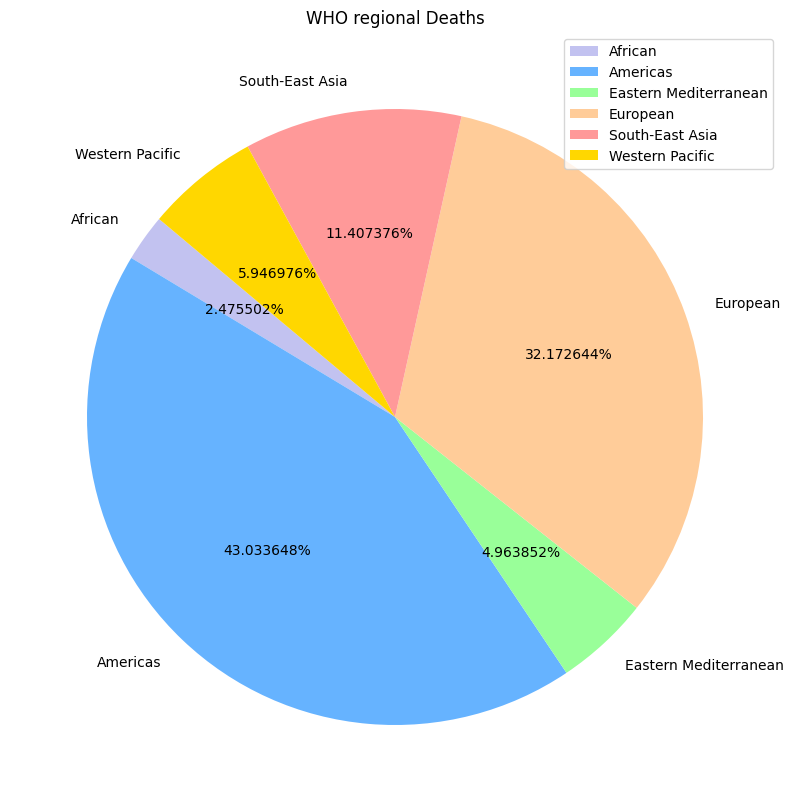

In [53]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999', '#FFD700']
plt.figure(figsize=(10, 10))
    
plt.pie(s_Continental_deaths.values(), labels= s_Continental_deaths.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("WHO regional Deaths")
plt.legend()
plt.show()

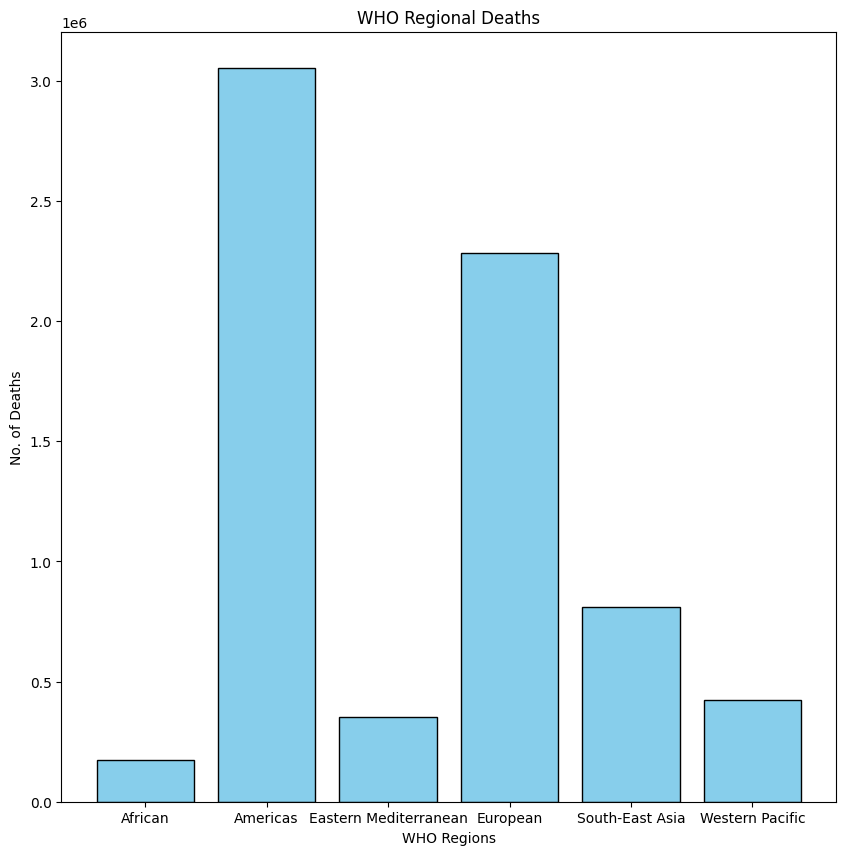

In [54]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_Continental_deaths.keys(), s_Continental_deaths.values(), color='skyblue', edgecolor='black')
plt.title("WHO Regional Deaths")
plt.xlabel("WHO Regions")
plt.ylabel("No. of Deaths")
plt.show()

The pie charts and bar graphs reveal that the European Region (EURO) recorded the highest number of cases (36.16%), followed closely by the Western Pacific Region (26.83%) and the Region of the Americas (24.88%). However, despite having the most reported cases, Europe did not have the highest number of deaths. Instead, the Region of the Americas accounted for the largest share of global COVID-19 deaths (43.03%), surpassing Europe, which reported 32.17% of total deaths. This suggests that while Europe had more infections, the mortality rate in the Americas was higher, likely due to differences in healthcare infrastructure, disease severity, and access to medical interventions. A key observation is that the African Region consistently had the lowest number of reported cases (1.23%) and deaths (2.48%). Another interesting trend is seen in the Western Pacific Region (WPRO), which had a significant proportion of cases (26.83%) but only 5.95% of deaths. This suggests that early containment measures, high vaccination rates, and strong healthcare systems in countries like China, Japan, and Australia contributed to a lower fatality rate.

From these observations, it is clear that higher case numbers did not always correlate with higher deaths, as seen in the case of Europe (high cases, moderate deaths) and the Americas (moderate cases, highest deaths). The variations in mortality rates across regions highlight the crucial role of healthcare infrastructure, pandemic response strategies, testing capacity, and demographic factors in shaping the outcomes of the pandemic.

In [55]:
h_who_region = h_data["WHO Region"]
h_countries,counts=np.unique(h_who_region,return_counts=True)
print("Central Tendencies and Dispersion for each WHO Region\n")
for country in h_countries:
    print(country,":")
    country_data = h_data[h_data["WHO Region"]==country]
    stats_display(country_data)

Central Tendencies and Dispersion for each WHO Region

Africa :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,191752.44,59227.5,3.237058e+11,568951.53,2166.0,4072925.0,4070759.0,19693.75,172291.25,152597.50
Total Deaths,3510.64,789.0,2.037073e+08,14272.61,0.0,102595.0,102595.0,188.75,1973.50,1784.75
Cases per 100K,5135.12,505.5,1.442358e+08,12009.82,39.0,55243.0,55204.0,288.75,1875.25,1586.50
Deaths per 100K,29.18,7.5,2.175510e+03,46.64,0.0,175.0,175.0,3.00,21.75,18.75


Americas :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,3582021.20,90274.0,2.168152e+14,14724647.46,1403.0,103436829.0,103435426.0,16101.0,1071433.00,1055332.00
Total Deaths,56507.67,940.5,3.729506e+10,193119.28,0.0,1218325.0,1218325.0,126.0,9224.25,9098.25
Cases per 100K,21548.91,17689.5,2.545220e+08,15953.75,0.0,61384.0,61384.0,9562.0,29588.00,20026.00
Deaths per 100K,175.78,178.5,1.353458e+04,116.34,0.0,670.0,670.0,103.0,235.75,132.75


Eastern Mediterranean :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,1064450.50,681952.0,2.439708e+12,1561956.53,11945.0,7627863.0,7615918.0,276272.75,1218268.25,941995.50
Total Deaths,15998.86,6072.5,9.041077e+08,30068.38,189.0,146837.0,146648.0,2404.25,15759.25,13355.00
Cases per 100K,8383.64,6756.0,8.977456e+07,9474.94,40.0,40939.0,40899.0,632.00,13036.00,12404.00
Deaths per 100K,67.09,36.0,4.073540e+03,63.82,7.0,249.0,242.0,19.50,93.25,73.75


Europe :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,4608915.08,1356122.0,7.507011e+13,8664300.96,26.0,39015118.0,39015092.0,210766.0,4828155.0,4617389.0
Total Deaths,37398.13,10012.0,4.954085e+09,70385.26,0.0,404239.0,404239.0,1016.0,29119.0,28103.0
Cases per 100K,36824.57,37073.0,4.406668e+08,20992.06,186.0,80260.0,80074.0,17851.0,54796.0,36945.0
Deaths per 100K,242.05,230.0,1.960103e+04,140.00,0.0,558.0,558.0,136.0,342.0,206.0


South-East Asia :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,6132910.4,838131.0,1.728804e+14,13148397.56,23460.0,45044607.0,45021147.0,300830.75,4120651.75,3819821.00
Total Deaths,80887.0,18200.5,2.485192e+10,157644.91,21.0,533662.0,533641.0,3244.75,33432.00,30187.25
Cases per 100K,6610.9,3203.0,9.140852e+07,9560.78,1182.0,34538.0,33356.0,1958.50,6030.00,4071.50
Deaths per 100K,39.3,40.0,5.072100e+02,22.52,3.0,79.0,76.0,22.50,56.00,33.50


Western Pacific :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,5960308.17,46864.0,3.231427e+14,17976171.21,4.0,99381761.0,99381757.0,7867.0,1839862.5,1831995.5
Total Deaths,12048.17,199.0,7.194780e+08,26823.09,0.0,122398.0,122398.0,13.5,2596.0,2582.5
Cases per 100K,25613.91,26035.0,4.375234e+08,20917.06,524.0,80130.0,79606.0,7228.5,34327.0,27098.5
Deaths per 100K,53.57,42.0,3.255730e+03,57.06,0.0,248.0,248.0,10.0,70.5,60.5


# Yearly Analysis across the Golbe

Now lets analyse the trends of number cases and deaths reported across the years 2020, 2021, 2022, 2023, 2024

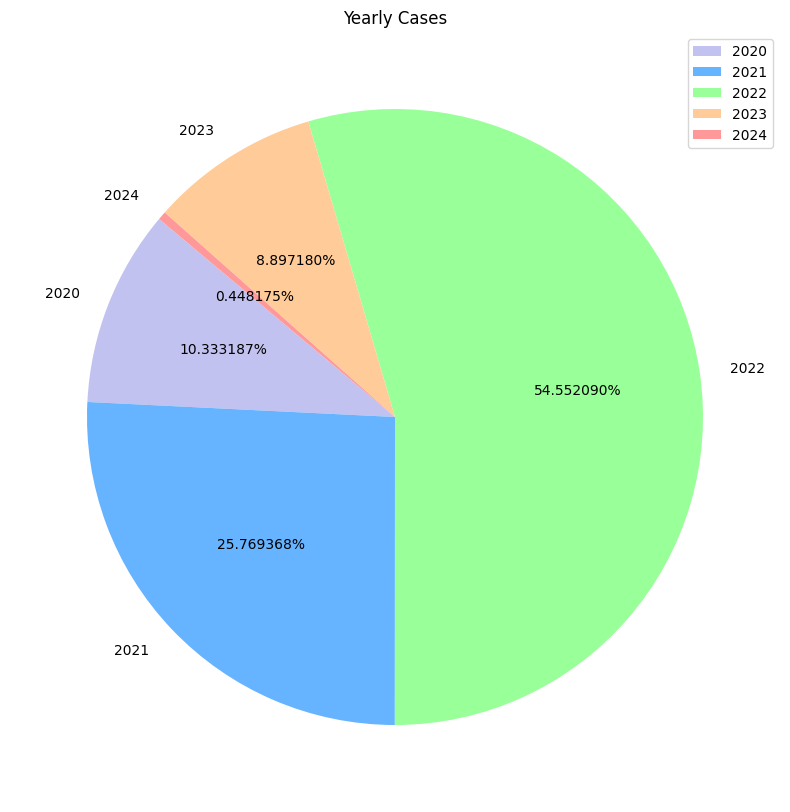

In [56]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999']
plt.figure(figsize=(10, 10))
    
plt.pie(s_yearly_cases.values(), labels= s_yearly_cases.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("Yearly Cases")
plt.legend()
plt.show()

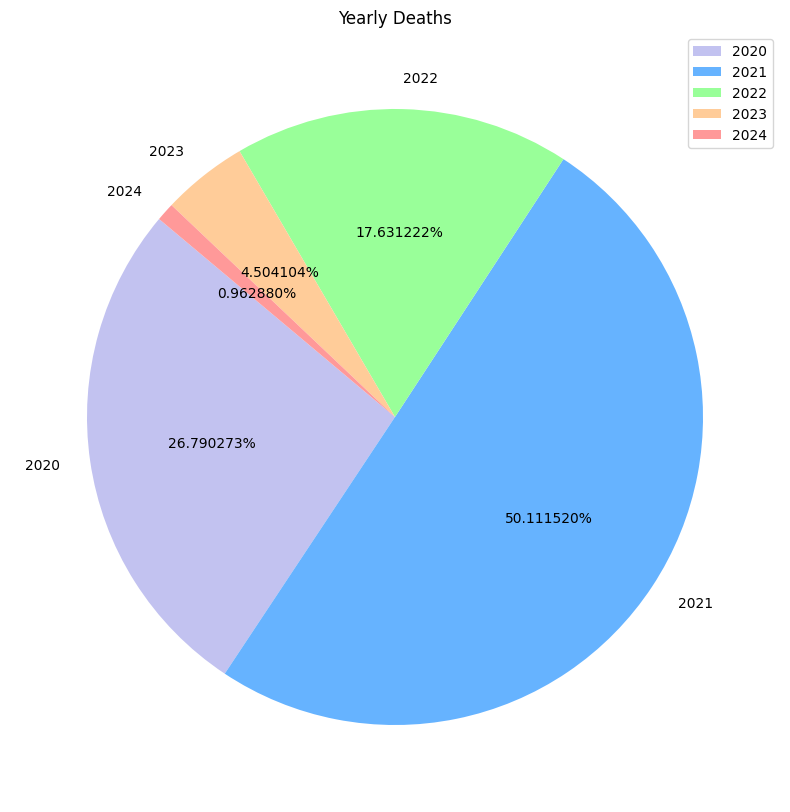

In [57]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999']
plt.figure(figsize=(10, 10))
    
plt.pie(s_yearly_deaths.values(), labels= s_yearly_deaths.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("Yearly Deaths")
plt.legend()
plt.show()

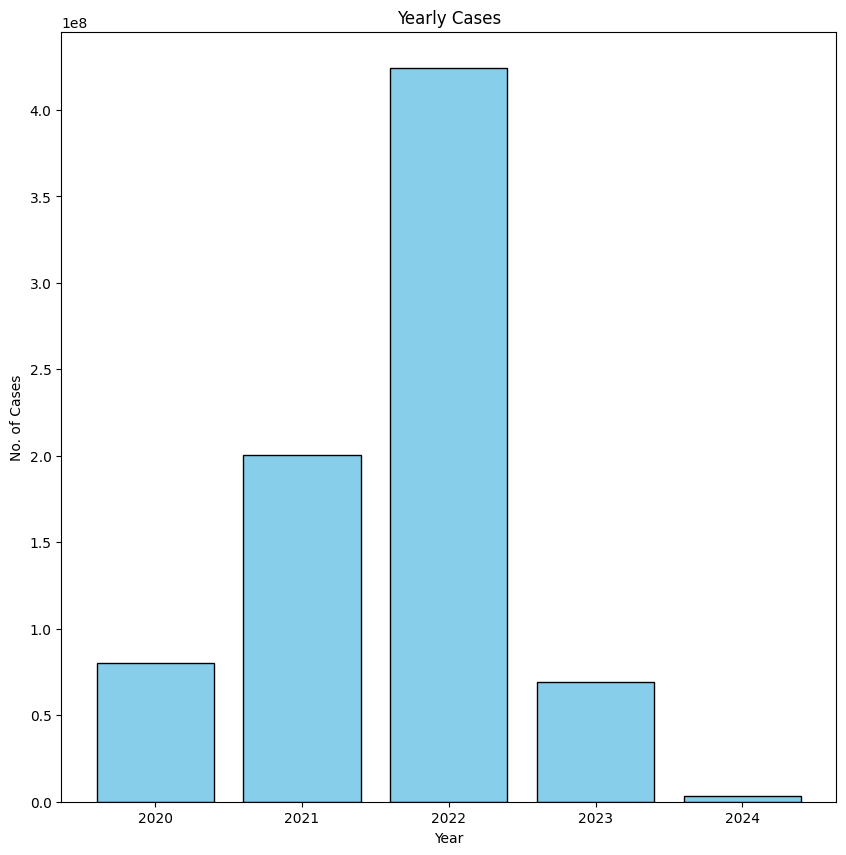

In [58]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_yearly_cases.keys(), s_yearly_cases.values(), color='skyblue', edgecolor='black')
plt.title("Yearly Cases")
plt.xlabel("Year")
plt.ylabel("No. of Cases")
plt.show()

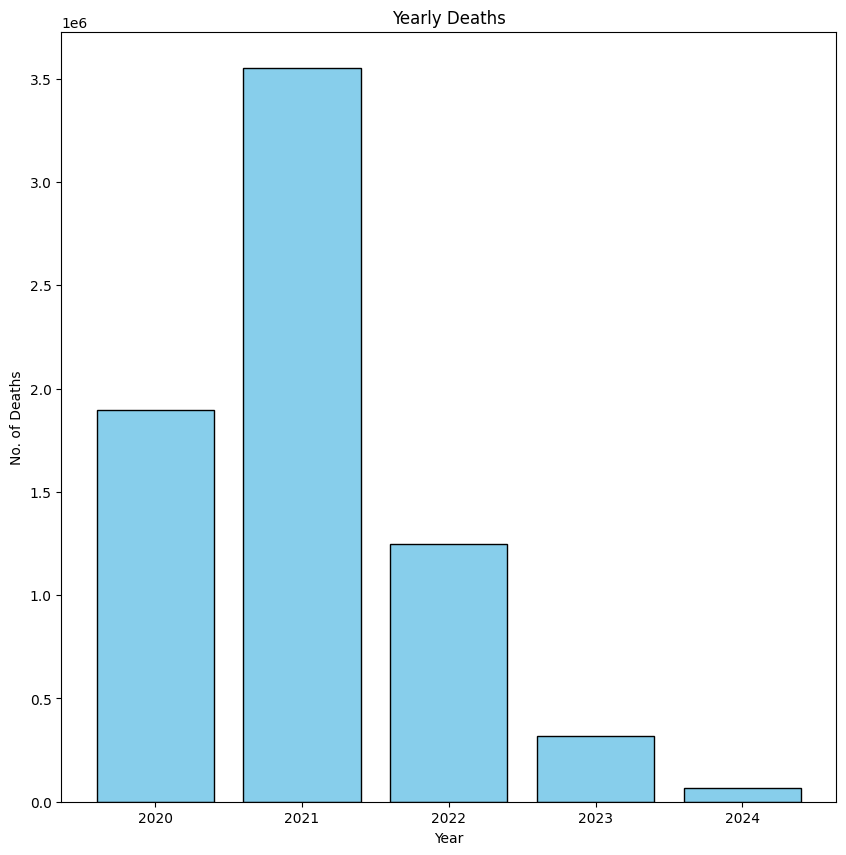

In [59]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_yearly_deaths.keys(), s_yearly_deaths.values(), color='skyblue', edgecolor='black')
plt.title("Yearly Deaths")
plt.xlabel("Year")
plt.ylabel("No. of Deaths")
plt.show()

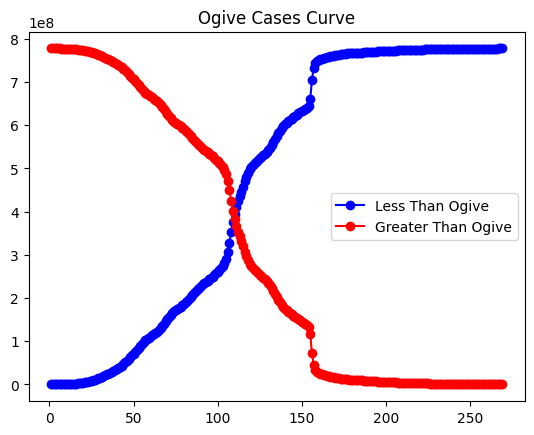

In [60]:
plt.plot(s_weeks, s_cweek_cases, marker='o', linestyle='-', color='b', label="Less Than Ogive")
plt.plot(s_weeks, s_greater_than_cases, marker='o', linestyle='-', color='r', label="Greater Than Ogive")
plt.title("Ogive Cases Curve")
plt.legend()
plt.show()

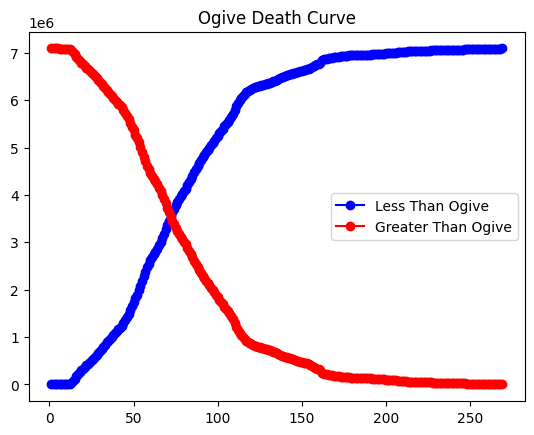

In [61]:
plt.plot(s_weeks, s_cweek_deaths, marker='o', linestyle='-', color='b', label="Less Than Ogive")
plt.plot(s_weeks, s_greater_than_deaths, marker='o', linestyle='-', color='r', label="Greater Than Ogive")
plt.legend()
plt.title("Ogive Death Curve")
plt.show()

In [62]:
df
# s_weekly_cases = (df.groupby('Date_reported')['Cumulative_cases'].sum().reset_index())
# s_cweek_cases = [item[0]  for item in s_weekly_cases.values.tolist()]
# s_weekly_cases_2020 = s_cweek_cases[s_weekly_cases['Date_reported'].str.contains('2020')].values
# s_weekly_cases_2021 = s_cweek_cases[53:106]
# s_weekly_cases_2022 = s_cweek_cases[106:159]
# s_weekly_cases_2023 = s_cweek_cases[159:212]
# s_weekly_cases_2024 = s_cweek_cases[212:]
# s_weekly_cases_2020

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,EMRO,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,EMRO,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,EMRO,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,EMRO,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...
64555,2025-01-26,ZW,Zimbabwe,AFRO,0.0,266404,0.0,5740
64556,2025-02-02,ZW,Zimbabwe,AFRO,4.0,266408,0.0,5740
64557,2025-02-09,ZW,Zimbabwe,AFRO,2.0,266410,0.0,5740
64558,2025-02-16,ZW,Zimbabwe,AFRO,0.0,266410,0.0,5740


In [63]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv("Weekly_covid_data.csv")

# Filter the DataFrame to include only rows where 'Date_reported' contains '2020'
df_2020 = df[df['Date_reported'].str.contains('2020')]

# Calculate weekly cumulative cases for 2020
s_weekly_cases_2020 = df_2020.groupby('Date_reported')['Cumulative_cases'].sum().reset_index()

# Convert to list
s_cweek_cases_2020 = [item[0] for item in s_weekly_cases_2020.values.tolist()]

# Print the 2020 weekly cases
print(s_cweek_cases_2020)

['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27']


In [64]:

df = pd.read_csv("Weekly_covid_data.csv")

def stats_display2(data):
    
    stats = {
        "Metric": [],
        "Mean": [],
        "Median": [],
        "Variance": [],
        "Standard Deviation": [],
        "Minimum": [],
        "Maximum": [],
        "Range": [],
        "Quartile 1": [],
        "Quartile 3": [],
        "Interquartile Range": []
    }
    
    metrics = {
        "New Cases": data["New_cases"],
        "New Deaths": data["New_deaths"],
    }
    
    for metric_name, metric_data in metrics.items():
        mean, median, mode = central_tendencies(metric_data)
        variance, std_dev, minimum, maximum, rnge, quartile1, quartile3, interquartile_range = dispersion(metric_data)
        
        stats["Metric"].append(metric_name)
        stats["Mean"].append(mean)
        stats["Median"].append(median)
        stats["Variance"].append(variance)
        stats["Standard Deviation"].append(std_dev)
        stats["Minimum"].append(minimum)
        stats["Maximum"].append(maximum)
        stats["Range"].append(rnge)
        stats["Quartile 1"].append(quartile1)
        stats["Quartile 3"].append(quartile3)
        stats["Interquartile Range"].append(interquartile_range)

    df = pd.DataFrame(stats)
    display(HTML(df.to_html(index=False)))
    
def filter_year_data(df, year):
    df_year = df[df['Date_reported'].str.contains(str(year))]
    df_year_grouped = df_year.groupby('Date_reported')[['New_cases', 'New_deaths']].sum().reset_index()
    return df_year_grouped


for year in np.arange(2020, 2025):
    globals()[f'df_{year}'] = filter_year_data(df, year)
    print(globals()[f'df_{year}'])
    print(f"{year}:")
    stats_display2(globals()[f'df_{year}'])




   Date_reported  New_cases  New_deaths
0     2020-01-05        2.0         3.0
1     2020-01-12       45.0         1.0
2     2020-01-19       90.0         2.0
3     2020-01-26     1895.0        56.0
4     2020-02-02    12538.0       310.0
5     2020-02-09    23059.0       545.0
6     2020-02-16    31734.0       864.0
7     2020-02-23     9578.0       692.0
8     2020-03-01     8273.0       519.0
9     2020-03-08    20206.0       650.0
10    2020-03-15    60446.0      2654.0
11    2020-03-22   171320.0      9698.0
12    2020-03-29   351478.0     22286.0
13    2020-04-05   466262.0     36847.0
14    2020-04-12   524359.0     47674.0
15    2020-04-19   507006.0     49959.0
16    2020-04-26   540268.0     44409.0
17    2020-05-03   545638.0     41130.0
18    2020-05-10   581533.0     38923.0
19    2020-05-17   610590.0     36165.0
20    2020-05-24   696716.0     34748.0
21    2020-05-31   729003.0     33368.0
22    2020-06-07   844662.0     34882.0
23    2020-06-14   902650.0     35276.0


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,1544553.65,1243382.0,1.999367e+12,1413989.62,2.0,4542432.0,4542430.0,437566.0,2111303.50,1673737.50
New Deaths,36491.02,38460.5,5.563663e+08,23587.42,1.0,85690.0,85689.0,30597.5,44794.25,14196.75


   Date_reported  New_cases  New_deaths
0     2021-01-03  4246641.0     86299.0
1     2021-01-10  5007618.0     92351.0
2     2021-01-17  4853319.0    100970.0
3     2021-01-24  4227124.0    103719.0
4     2021-01-31  3735931.0    100661.0
5     2021-02-07  3165479.0     89292.0
6     2021-02-14  2720814.0     81496.0
7     2021-02-21  2474264.0     68436.0
8     2021-02-28  2661476.0     64006.0
9     2021-03-07  2737571.0     60483.0
10    2021-03-14  2963243.0     60687.0
11    2021-03-21  3328321.0     63183.0
12    2021-03-28  3832510.0     69086.0
13    2021-04-04  4113875.0     75435.0
14    2021-04-11  4559074.0     80379.0
15    2021-04-18  5232835.0     85910.0
16    2021-04-25  5695990.0     91431.0
17    2021-05-02  5694053.0     96003.0
18    2021-05-09  5464575.0     92233.0
19    2021-05-16  4812039.0     87600.0
20    2021-05-23  4215812.0     86189.0
21    2021-05-30  3547504.0     78604.0
22    2021-06-06  3006019.0     68450.0
23    2021-06-13  2647895.0     71179.0


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,3851877.38,3794807.0,8.196227e+11,905330.17,2474264.0,6090327.0,3616063.0,3084749.0,4446417.50,1361668.50
New Deaths,68256.88,66483.0,2.636200e+08,16236.38,46088.0,103719.0,57631.0,54426.0,80658.25,26232.25


   Date_reported   New_cases  New_deaths
0     2022-01-02  10468828.0     42691.0
1     2022-01-09  16597488.0     45642.0
2     2022-01-16  20661705.0     52343.0
3     2022-01-23  23541614.0     59734.0
4     2022-01-30  23424524.0     67836.0
5     2022-02-06  19928202.0     75874.0
6     2022-02-13  15911905.0     76455.0
7     2022-02-20  12871674.0     69615.0
8     2022-02-27  11049873.0     59480.0
9     2022-03-06  10900250.0     51921.0
10    2022-03-13  11805470.0     43777.0
11    2022-03-20  12378386.0     33818.0
12    2022-03-27  10998281.0     46476.0
13    2022-04-03   9369181.0     26859.0
14    2022-04-10   7200182.0     22874.0
15    2022-04-17   5697811.0     19205.0
16    2022-04-24   4703247.0     16834.0
17    2022-05-01   3998913.0     16264.0
18    2022-05-08   3619137.0     12906.0
19    2022-05-15   3964199.0     11201.0
20    2022-05-22   3782153.0     10380.0
21    2022-05-29   3387015.0     10336.0
22    2022-06-05   3259098.0      9271.0
23    2022-06-12

Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,8154176.71,5023926.5,5.656886e+13,7521227.17,2334637.0,44236227.0,41901590.0,3357609.75,10924757.75,7567148.0
New Deaths,24015.48,14677.5,3.920551e+08,19800.38,8837.0,76455.0,67618.0,10844.25,28598.75,17754.5


   Date_reported   New_cases  New_deaths
0     2023-01-01  27732700.0     32378.0
1     2023-01-08  10980015.0     24570.0
2     2023-01-15   4886948.0     10895.0
3     2023-01-22   2514888.0      9717.0
4     2023-01-29   1559501.0      8399.0
5     2023-02-05   1385657.0     69688.0
6     2023-02-12   1247359.0     10105.0
7     2023-02-19   1145793.0      8541.0
8     2023-02-26   1072885.0      7772.0
9     2023-03-05   1028478.0      7005.0
10    2023-03-12    894852.0      6342.0
11    2023-03-19    879247.0      6624.0
12    2023-03-26    833141.0      6711.0
13    2023-04-02    799538.0      2539.0
14    2023-04-09    701069.0      5621.0
15    2023-04-16    694820.0      5242.0
16    2023-04-23    737620.0      5273.0
17    2023-04-30    684613.0      4734.0
18    2023-05-07    609449.0      4724.0
19    2023-05-14    566903.0      5064.0
20    2023-05-21    371881.0      2852.0
21    2023-05-28    347048.0      2732.0
22    2023-06-04    289955.0      2413.0
23    2023-06-11

Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,1304813.83,340117.0,1.598337e+13,3997921.33,120576.0,27732700.0,27612124.0,201467.0,799538.0,598071.0
New Deaths,6019.28,2787.0,1.066624e+08,10327.75,932.0,69688.0,68756.0,2274.0,5621.0,3347.0


   Date_reported  New_cases  New_deaths
0     2024-01-07   200489.0      4279.0
1     2024-01-14   189154.0      4057.0
2     2024-01-21   136564.0      3652.0
3     2024-01-28   115731.0      3041.0
4     2024-02-04   100156.0      2499.0
5     2024-02-11    88589.0      2256.0
6     2024-02-18    78519.0      1868.0
7     2024-02-25    76398.0      1781.0
8     2024-03-03    71781.0      1716.0
9     2024-03-10    60977.0      1467.0
10    2024-03-17    58012.0      1345.0
11    2024-03-24    50818.0      1262.0
12    2024-03-31   114064.0      1004.0
13    2024-04-07    40417.0       906.0
14    2024-04-14    39930.0       842.0
15    2024-04-21    32398.0       726.0
16    2024-04-28    34810.0       643.0
17    2024-05-05    31481.0       623.0
18    2024-05-12    34338.0       541.0
19    2024-05-19    38307.0       492.0
20    2024-05-26    32278.0       533.0
21    2024-06-02    34920.0       498.0
22    2024-06-09    35948.0       532.0
23    2024-06-16    36717.0       566.0


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,66990.98,56243.0,1.232444e+09,35106.18,31481.0,200489.0,169008.0,45336.25,78904.75,33568.50
New Deaths,1311.54,1046.5,7.208783e+05,849.05,492.0,4279.0,3787.0,746.25,1492.00,745.75


In [65]:
s_weekly_deaths = (df.groupby('Date_reported')['Cumulative_deaths'].sum().reset_index())
s_weekly_deaths

,Date_reported,Cumulative_deaths
0,2020-01-05,3
1,2020-01-12,4
2,2020-01-19,6
3,2020-01-26,62
4,2020-02-02,372
...,...,...
264,2025-01-26,7087703
265,2025-02-02,7088703
266,2025-02-09,7089561
267,2025-02-16,7090259


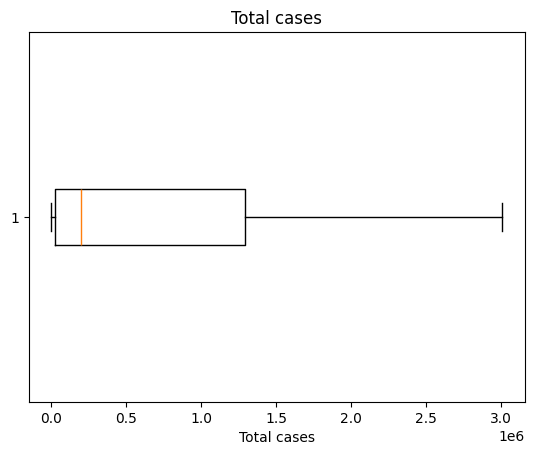

In [66]:
plt.boxplot(h_total_cases,showfliers=False,vert=False)
plt.title("Total cases")
plt.xlabel("Total cases")
plt.show()

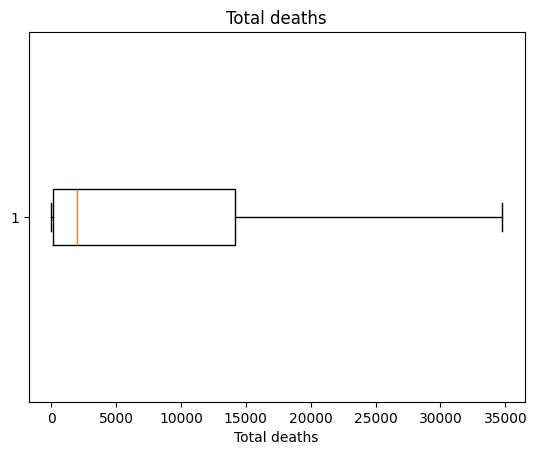

In [67]:
plt.boxplot(h_total_deaths,showfliers=False,vert=False)
plt.title("Total deaths")
plt.xlabel("Total deaths")
plt.show()

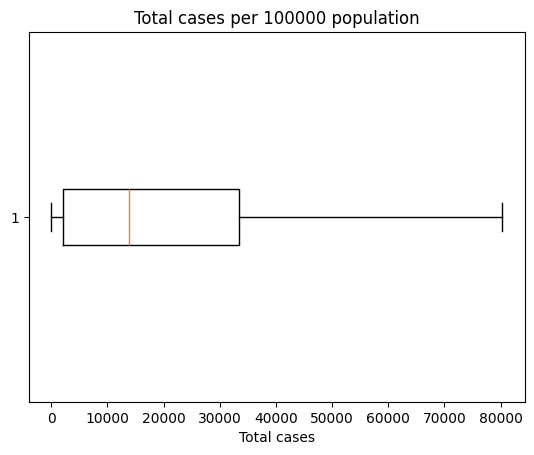

In [68]:
plt.boxplot(h_per100_cases,showfliers=False,vert=False)
plt.title("Total cases per 100000 population")
plt.xlabel("Total cases")
plt.show()

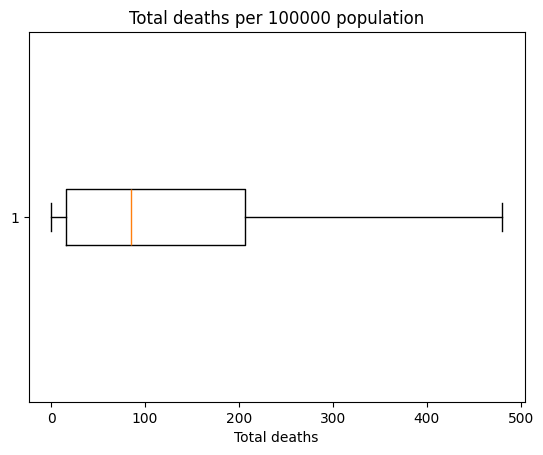

In [69]:
plt.boxplot(h_per100_deaths,showfliers=False,vert=False)
plt.title("Total deaths per 100000 population")
plt.xlabel("Total deaths")
plt.show()

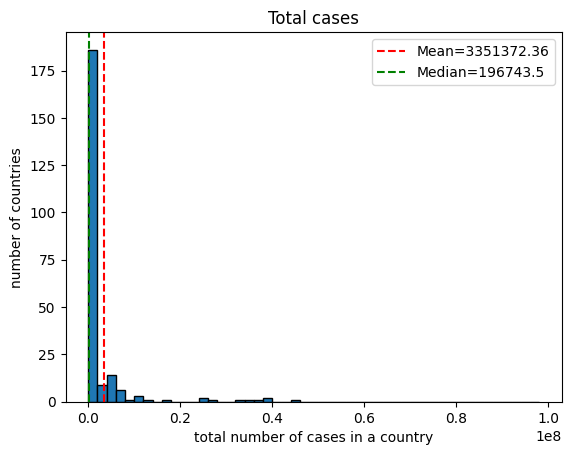

In [70]:
a_summary_data=pd.read_csv('Cumulative_WHO_data.csv')
a_total_cases=a_summary_data['Cases - cumulative total']
a_total_cases_bins=[i for i in np.arange(0,100000000,2000000)]
plt.hist(a_total_cases,bins=a_total_cases_bins,edgecolor='black')
plt.axvline(np.mean(a_total_cases),color='red',label=f'Mean={round(np.mean(a_total_cases),2)}',linestyle='--')
plt.axvline(np.median(a_total_cases),color='green',label=f'Median={np.median(a_total_cases)}',linestyle='--')
plt.legend()
plt.title('Total cases')
plt.xlabel('total number of cases in a country')
plt.ylabel('number of countries')
plt.show()

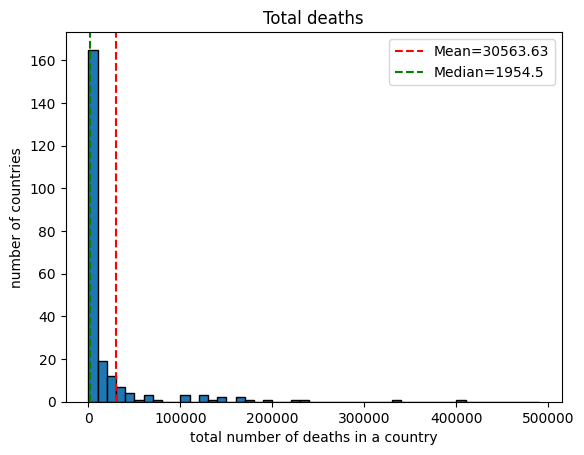

In [71]:
a_total_deaths=a_summary_data['Deaths - cumulative total']
a_total_deaths_bins=[i for i in np.arange(0,500000,10000)]
plt.hist(a_total_deaths,bins=a_total_deaths_bins,edgecolor='black')
plt.axvline(np.mean(a_total_deaths),color='red',label=f'Mean={round(np.mean(a_total_deaths),2)}',linestyle='--')
plt.axvline(np.median(a_total_deaths),color='green',label=f'Median={np.median(a_total_deaths)}',linestyle='--')
plt.legend()
plt.title('Total deaths')
plt.xlabel('total number of deaths in a country')
plt.ylabel('number of countries')
plt.show()

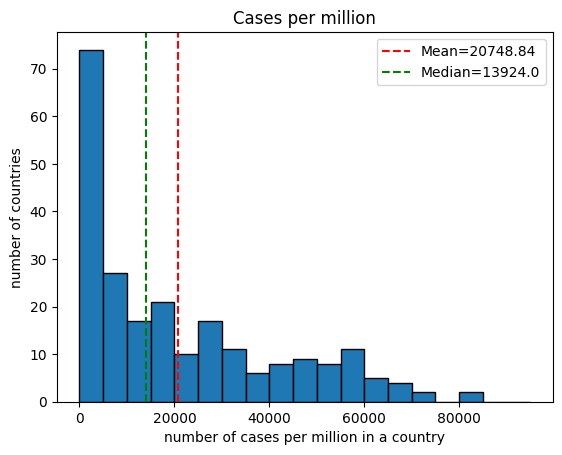

In [72]:
a_cases_per_million=a_summary_data['Cases - cumulative total per 100000 population']
a_cases_per_million_bins=[i for i in np.arange(0,100000,5000)]
plt.hist(a_cases_per_million,bins=a_cases_per_million_bins,edgecolor='black')
plt.axvline(np.mean(a_cases_per_million),color='red',label=f'Mean={round(np.mean(a_cases_per_million),2)}',linestyle='--')
plt.axvline(np.median(a_cases_per_million),color='green',label=f'Median={np.median(a_cases_per_million)}',linestyle='--')
plt.legend()
plt.xlabel('number of cases per million in a country')
plt.ylabel('number of countries')
plt.title('Cases per million')
plt.show()


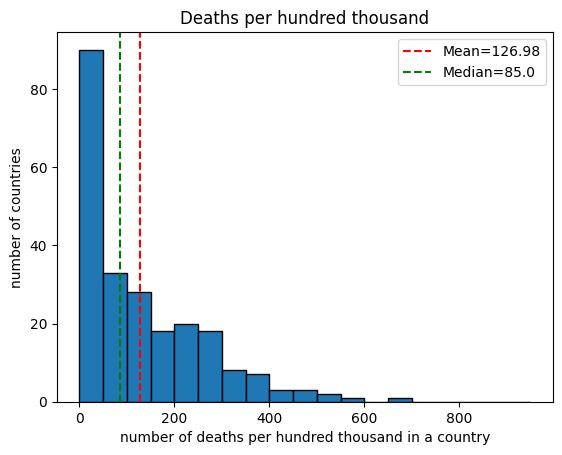

In [73]:
a_deaths_per100000=a_summary_data['Deaths - cumulative total per 100000 population']
a_deaths_per_million_bins=[i for i in np.arange(0,1000,50)]
plt.hist(a_deaths_per100000,bins=a_deaths_per_million_bins,edgecolor='black')
plt.axvline(np.mean(a_deaths_per100000),color='red',label=f'Mean={round(np.mean(a_deaths_per100000),2)}',linestyle='--')
plt.axvline(np.median(a_deaths_per100000),color='green',label=f'Median={np.median(a_deaths_per100000)}',linestyle='--')
plt.legend()
plt.xlabel('number of deaths per hundred thousand in a country')
plt.ylabel('number of countries')
plt.title('Deaths per hundred thousand')
plt.show()

In [74]:
print("Central Tendencies and Dispersion for the data")
stats_display(h_data)

Central Tendencies and Dispersion for the data


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,3351372.36,196743.5,1.311427e+14,11451757.08,4.0,103436829.0,103436825.0,25812.75,1293929.00,1268116.25
Total Deaths,30563.63,1954.5,1.180038e+10,108629.56,0.0,1218325.0,1218325.0,180.75,14134.00,13953.25
Cases per 100K,20748.84,13924.0,4.319752e+08,20784.01,0.0,80260.0,80260.0,2139.75,33421.25,31281.50
Deaths per 100K,126.98,85.0,1.725372e+04,131.35,0.0,670.0,670.0,15.75,206.50,190.75


# Applying the Central Limit Theorem (CLT) to Data

## Central Limit Theorem (CLT)

The **Central Limit Theorem (CLT)** states that for a sufficiently large sample size, regardless of the population's original distribution, the sampling distribution of the sample mean will approximate a normal distribution.

## Mathematical Formulation

Let $ X_1, X_2, \dots, X_n $ be a random sample of size $ n $ from a population with mean $ \mu $ and variance $ \sigma^2 $. The sample mean is defined as:

$$
\overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

As the sample size $ n $ increases, the standardized sample mean:

$$
Z = \frac{\overline{X} - \mu}{\sigma / \sqrt{n}}
$$

converges in distribution to a standard normal distribution:

$$
Z \sim N(0,1)
$$

## Applying CLT to Real Data

We apply the CLT to analyze the sampling distribution of the mean for the following columns:

- **Total Cases**
- **Total Deaths**
- **Total Cases per 100K**
- **Total Deaths per 100K**

### Procedure:

1. Randomly select a sample of size \( s \) from the given dataset.
2. Compute the mean of this sample and store the result.
3. Repeat this process for a sufficiently large number of iterations (\( n \)).
4. Plot a histogram of the sample means to visualize the resulting distribution.

This experiment will demonstrate how the distribution of the sample mean approaches normality as the number of samples increases, validating the Central Limit Theorem.


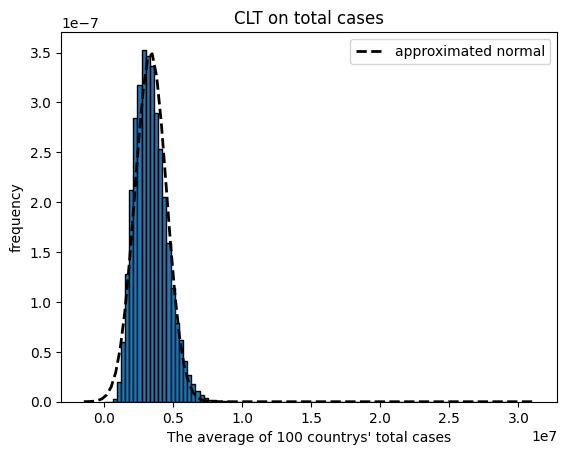

In [115]:


a_total_cases_CLT_size=100
a_total_cases_bins1=[i for i in np.arange(0,30000000,300000)]
a_random_selection_total_cases=[np.mean(np.random.choice(a_total_cases,size=a_total_cases_CLT_size,replace=True)) for i in np.arange(0,50000)]
plt.hist(a_random_selection_total_cases,bins=a_total_cases_bins1,edgecolor='black',density=True)
mu, std = norm.fit(a_random_selection_total_cases)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_total_cases_CLT_size} countrys\' total cases')
plt.ylabel('frequency')
plt.title('CLT on total cases')
plt.show()

#### Observations

1. The histogram of sample means closely follows a normal distribution, confirming the Central Limit Theorem (CLT).  
2. There is slight right skewness, indicating that the original data for total cases has extreme values or outliers.  
3. The peak of the distribution is around **2.5 million cases**, suggesting that most sample means are concentrated around this value.  
4. The black dashed line (approximated normal curve) aligns well with the histogram, demonstrating that the sample mean distribution tends to normality despite the original data's distribution.  
5. The spread of the distribution shows some variation, but the majority of sample means remain within a well-defined range.  


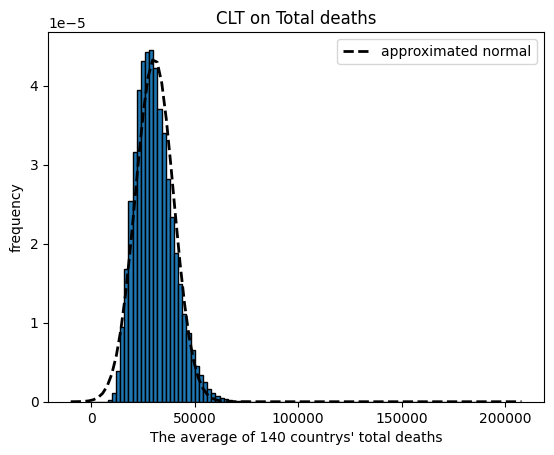

In [119]:
a_total_deaths_CLT_size=140
a_total_deaths_bins1=[i for i in np.arange(0,200000,2000)]
random_selection_total_deaths=[np.mean(np.random.choice(a_total_deaths,size=a_total_deaths_CLT_size,replace=True)) for i in np.arange(0,100000)]
plt.hist(random_selection_total_deaths,bins=a_total_deaths_bins1,edgecolor='black',density=True)
mu, std = norm.fit(random_selection_total_deaths)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_total_deaths_CLT_size} countrys\' total deaths')
plt.ylabel('frequency')
plt.title('CLT on Total deaths')
plt.show()

#### Observations 

1. The histogram of sample means follows a near-normal distribution, supporting the **Central Limit Theorem (CLT)**.  
2. There is a slight right skew, suggesting that some countries have significantly higher total deaths, influencing the distribution.  
3. The peak of the distribution is around **30,000 to 40,000 deaths**, indicating that most sample means are concentrated within this range.  
4. The approximated normal curve (black dashed line) fits the histogram well, reinforcing the normality of the sampling distribution.  
5. The spread shows variation, but most sample means fall within a predictable range, confirming that larger sample sizes help achieve normality.  


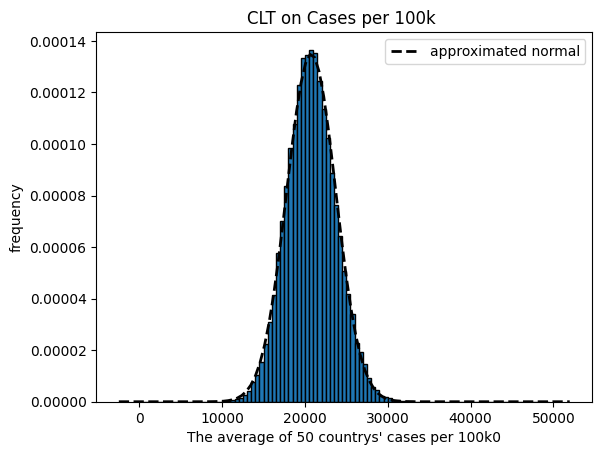

In [113]:
a_cases_per_million_CLT_size=50
a_cases_per_million_bins1=[i for i in np.arange(0,50000,500)]
random_selection_cases_per_million=[np.mean(np.random.choice(a_cases_per_million,size=a_cases_per_million_CLT_size,replace=True)) for i in np.arange(0,50000)]
plt.hist(random_selection_cases_per_million,bins=a_cases_per_million_bins1,edgecolor='black',density=True)
mu, std = norm.fit(random_selection_cases_per_million)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_cases_per_million_CLT_size} countrys\' cases per 100k0')
plt.ylabel('frequency')
plt.title('CLT on Cases per 100k ')
plt.show()

#### Observations
1. The histogram of sample means follows a nearly perfect **normal distribution**, strongly supporting the **Central Limit Theorem (CLT)**.  
2. The distribution is **symmetrical**, indicating that the original dataset may have been relatively balanced without extreme outliers.  
3. The peak of the distribution is around **20,000 cases per 100K**, meaning most sample means are concentrated near this value.  
4. The approximated normal curve (black dashed line) closely matches the histogram, confirming that the sample mean distribution converges to normality.  
5. The spread of the distribution is moderate, suggesting that while there is variation, most sample means remain within a predictable range.  


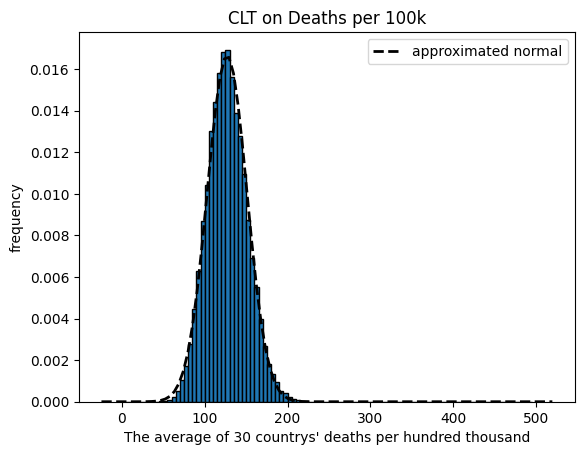

In [120]:
a_deaths_per100000_CLT_size=30
a_deaths_per_million_bins1=[i for i in np.arange(0,500,5)]
random_selection_deaths_per100000=[np.mean(np.random.choice(a_deaths_per100000,size=a_deaths_per100000_CLT_size,replace=True)) for i in np.arange(0,50000)]
plt.hist(random_selection_deaths_per100000,bins=a_deaths_per_million_bins1,edgecolor='black',density=True)
mu, std = norm.fit(random_selection_deaths_per100000)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_deaths_per100000_CLT_size} countrys\' deaths per hundred thousand')
plt.title('CLT on Deaths per 100k')
plt.ylabel('frequency')
plt.show()

#### Observations 

1. The histogram of sample means closely follows a **normal distribution**, confirming the **Central Limit Theorem (CLT)**.  
2. The distribution is **symmetrical**, indicating that extreme outliers or skewness in the original data are minimal.  
3. The peak of the distribution is around **130 deaths per 100K**, showing that most sample means are centered around this value.  
4. The approximated normal curve (black dashed line) closely aligns with the histogram, validating that the sample mean distribution approaches normality.  
5. The spread of the distribution is relatively narrow, suggesting that sample means are consistently distributed within a predictable range.  
